# Lab 6: Word2Vec

In this lab, we will explore vector representations of words using PyTorch. The word embeddings are [Glove vector embeddings](https://nlp.stanford.edu/projects/glove/). Your task will be to infer what features might be encoded in these embeddings, and how we should reason about them as representations of words.

Once you finish working on this lab, please download it as a .ipynb notebook and submit the notebook to Moodle.


### Guiding Questions

1. What are vector representations of words?
1. How can we use word vectors to get at linguistic meaning?

### Learning Objectives.

1. Understand what word embeddings are
1. Hands on experience using PyTorch
1. Use word embeddings to finding similar words
1. Use word embeddings for analogical reasoning

### Rubric

| Question | Points |
| ------| ----- |
| Cosine Similarity | 15 Points |
| Top N Similar Words | 20 Points |
| Feature Reflection | 10 Points |
| Compute Analogies | 20 Points |
| Two new analogies | 15 Points |
| General Reflection | 20 Points |

### Deadline:

October 22, 11PM EST

### Submission format:
ipynb file saved after running your code cells and submitted to Moodle

## Introduction to Word2Vec Together

Word2Vec is a popular way of learning word embeddings that has had success in
natural language processing and its applications. Additionally, it has had a
sustained popularity in cognitive science (as one way of modeling the
distributional hypothesis).

Word2vec is a
specific proposal for learning word embeddings discussed originally in two
papers, [Mikolov et al. (2013a)](https://arxiv.org/abs/1301.3781) and [Mikolov et al. (2013b)](https://arxiv.org/abs/1310.4546).

The goal of any embedding model can be stated quite simply: learn high quality, dense
vector representations of words. The notion of quality we are after is
that we want our vectors to encode linguistically meaningful information
(cf. one could just randomly assign a vector to a word, but that
wouldn't be particularly helpful). Vectors come with some useful operations and
properties that we will use to infer from and induce in our vectors something
like "meaning". You will see these in completing the lab. But for now it's
sufficient to say that we want words that we think are "similar" to have
vectors which are also "similar".


It is perhaps useful to ground what we've discussed so far in a visual
representation. Recalling our early discussion, vectors describe movements in
space. In this lecture, we will assume our point of displacement is the origin,
and subsequently, we will focus on the end state induced by the vector. In other
words, treating the vector as a point in space. We will build vectors which are
drawn from larger euclidean spaces in practice, but I will focus on vectors from
$R^2$, for the obvious reason that we can't visualize 4 or more dimensions
easily and 3 dimensions is hard to plot.

We will populate our space with vectors associate with words. In our running
example, we will consider 5 words: 'the', 'cat', 'dog', 'feline', and 'canine'.
Our initial vectors map for these words may correspond to:

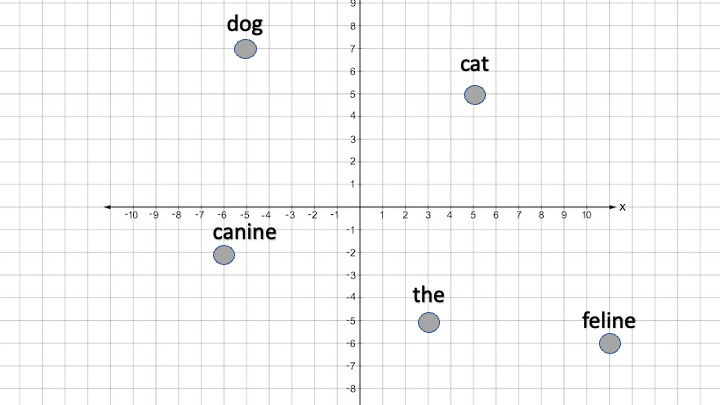

So, for example, the word embedding for 'the' shown above is the vector, drawn
from $R^2$,
$\left[\begin{array}{rr}
3 & -5 \\
\end{array}\right]$. What we want is to update our embeddings such that words
that are similar are close in space. We might, then, end up with an end state
model with the following word embeddings.

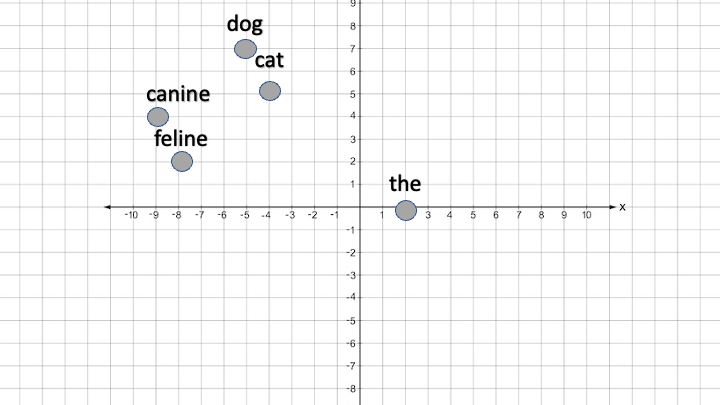

Notice that 'dog' and 'cat' are now quite close to each other. Moreover,
visually the relationship between 'dog' - 'cat' and 'canine' - 'feline'
appears similar (we will discuss how to formalize this notion in a moment).
Word2vec is a particular learning dynamic that goes from something like our
initial figure to something like our end state.


### Learning Word Vectors: A bit more exposition

Let's just step, at a high level, through the learning process for a toy
example.
Suppose, we have the following sentences:

the man ran the marathon

the kid ran to the zoo

the dog ate the food

the cat ate the food

San Francisco is a city

San Francisco is beautiful


This would yield a vocabulary containing 17 words 'the', 'man', 'ran', 'marathon', 'kid',
'to', 'zoo', 'dog', 'ate', 'food', 'cat', 'San', 'Francisco', 'is', 'a', 'city',
and 'beautiful'. Below, I will plot the stages of learning using blue font for
the target embeddings and red font for the context embeddings. The initial model
assigns the following vectors to these words.

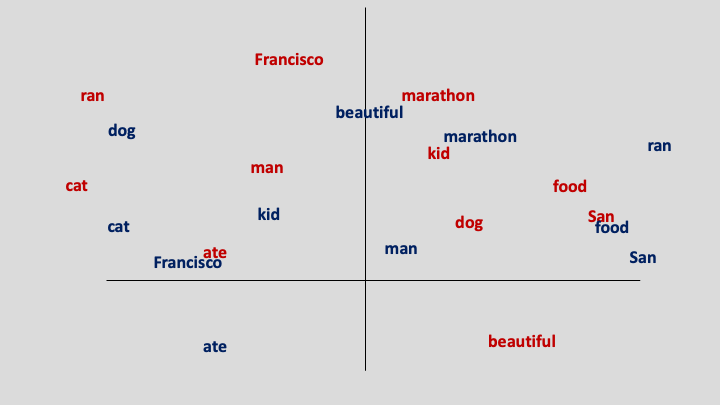

 Moreover, I will
use a window size of 2, and I will ignore 'the', 'is', 'a', and 'to'.
So the following is the list of skipgrams that I'll consider.

|      |     |   |    |   |
| ----- | --- | - | --- | --- |  
| (man, ran) | (ran, man) | (ran, marathon) | (marathon, ran) | (kid, ran) |
| (ran, kid) | (dog, ate) | (ate, dog) | (ate, food) | (food, ate) |
| (cat, ate) | (ate, cat) | (ate, food) | (San, Francisco) | (Francisco, San) |
| (San, Francisco) | (Francisco, San) | (Francisco, beautiful) | (beautiful, Francisco) | |

Learning proceeds by shifting vectors near one another based on the skipgrams. I
demonstrate this below:

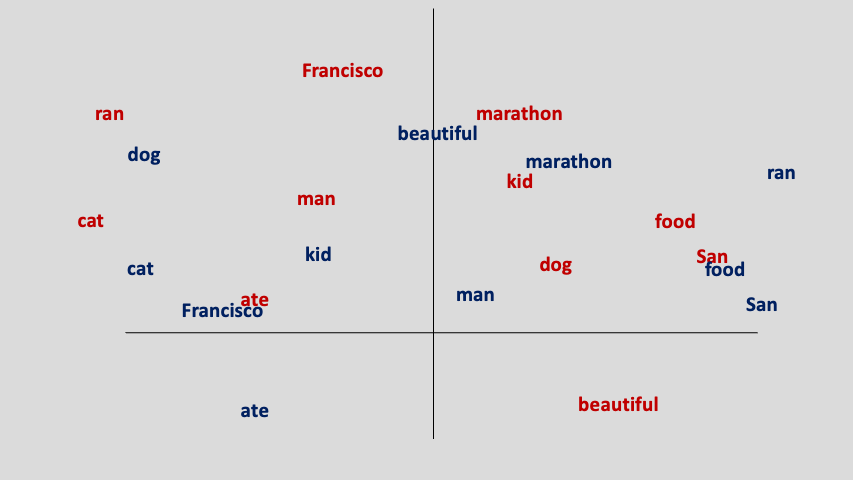

This learning process might repeat for some number of epochs. In watching it
unfold, notice the differences in information encoded by the similarity of
target embeddings (in blue) and context embeddings (in red). The model after one
full epoch is:


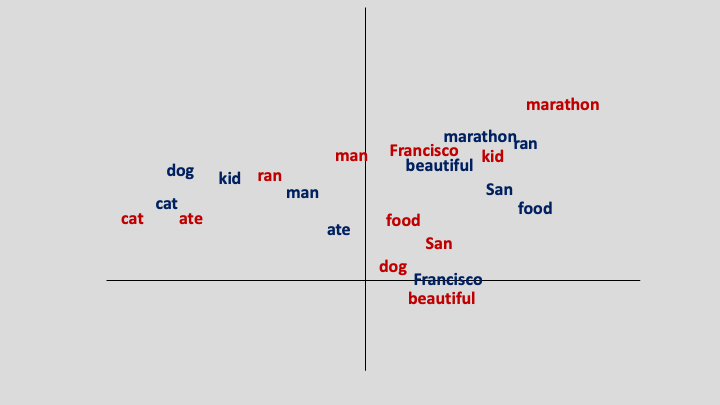

### Basic math

The following just refreshes some things that are expanded on in the
previous lecture on that basic mathematics needed for modeling in the course.
Here we will equate the visualizations above with the math which instantiates
the desired relations. All of this revolves around the dot product. Recall, that
the dot product is defined as follows:

$$\mathbf{v} \cdot \mathbf{w} = \sum_{i=0}^{n} \mathbf{v}_i \mathbf{w}_i = \mathbf{v}_0 \mathbf{w}_0 + \mathbf{v}_1 \mathbf{w}_1 + ... + \mathbf{v}_n \mathbf{w}_n$$

[comment]: _comment_

In geometric terms, the dot product is equatable with the (scaled) cosine of the
angle between the vectors:

$$\mathbf{v} \cdot \mathbf{w} = |\mathbf{v}| |\mathbf{w}|\textrm{cos}(\theta) $$

The magnitude of vectors is given by $|| ||$, so the cosine of the angle is scaled
by the magnitudes of the vectors. The magnitude of a vector is also called the
vector norm. The definition it quite simple (and familiar if you recall
euclidean distance):

$$ ||\mathbf{x}|| = \sqrt{x_0^2 + x_1^2 + \dots + x_n^2} $$

Notice that this just gives the length of the line we associate with a vector
(i.e. the length of the arrow). So, for example, looking at our final word
embeddings above, 'cat' $= \left[\begin{array}{rr} - 4 & 5 \\ \end{array}\right]$
and 'the' $= \left[\begin{array}{rr} 2  & 0 \\
\end{array}\right]$.
The magnitude of the vector associated with 'cat' is
$\sqrt{-4^2 + 5^2} = \sqrt{16+25} = \sqrt{41} \approx 6.40$, and the magnitude
of the vector associated with 'the' is $2$.

This [applet](https://www.falstad.com/dotproduct/) is a nice way to interactively see the relationship between
magnitude, direction, and the angle between vectors via the dot product. We can
visualize this relationship by noting that the dot product projects one vector
onto the other:

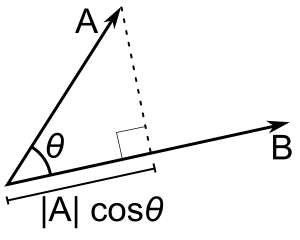


We obtain a similarity metric from this geometric proprety of the dot product.
Namely, we can define Cosine Similarity:  

$$\textrm{CosineSimilarity}(\mathbf{w}, \mathbf{v}) = \frac{ \mathbf{w} \cdot
\mathbf{v}}{|\mathbf{w}||\mathbf{v}|} $$

Notice that this is nothing more than $\textrm{cos}(\theta)$. Cosine is bound
between -1 and 1, so our similarity metric will range from $-1$ (when the vectors
are pointing in entirely opposite directions) to $1$ (when the vectors are totally
aligned). Additionally, the midpoint ($0$) means the vectors are orthogonal
(i.e. perpendicular).

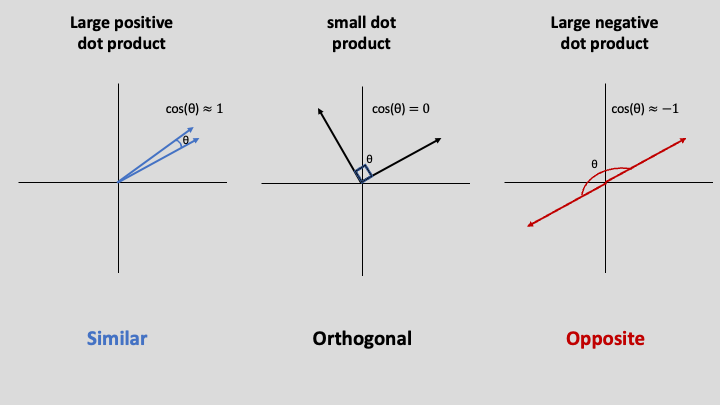

Let's return to our final word vector figure above which
contains the following mappings from words to embedding vectors:

| word | embedding |
| ----- | ------   |
| 'the' | $\left[\begin{array}{rr} 2 & 0 \\ \end{array}\right]$ |
| 'cat' | $\left[\begin{array}{rr} -4 & 5 \\ \end{array}\right]$ |
| 'feline' | $\left[\begin{array}{rr} -8 & 2 \\ \end{array}\right]$ |
| 'dog' | $\left[\begin{array}{rr} -5 & 7 \\ \end{array}\right]$ |
| 'canine' | $\left[\begin{array}{rr} -9 & 4 \\ \end{array}\right]$ |

We can use cosine similarity to assign a similarity value to these vectors. For
example, the pair ('the', 'cat') has a cosine similarity of $-0.6247$, while the
pair ('cat', 'dog') as a cosine similarity of $0.9985$. We can even use other
vector operations in a (sometimes) interpretable way. For example, take
addition and subtraction. We might do something like 'canine' - 'dog' (where the
word stands in for the vector) to yield something we might interpret as the
vector for whatever aspect of "meaning" is conveyed by the word 'canine' and not
the word 'dog' (perhaps some sort of vector representing the more technical
animal terms). Concretely, this would be the vector $\left[\begin{array}{rr} -4 & -3\\ \end{array}\right]$.

Notice that this vector is nothing more than the vector which describes the
transformation of the vector for 'dog' into the vector for 'canine'. In other
words, it is the slope of the line relating these two vectors, which we might
'read' as saying move left 4 and down 3. We might then intepret this
transformation (move left 4 and down 3) as the transformation asociated with
taking an certain vector for an animal and turning it into a new vector which contains the
more technical sense of the animal vector. For example, we can add this vector
to 'cat' and the result will be $\left[\begin{array}{rr} -8 & 2 \\ \end{array}\right]$,
which just so happens to be the vector for 'feline'.  

Now, I have contrived this example to demonstrate these possiblities. In
practice, similar relations have been reported. The "famous" example is one can
take the vector for 'king' subtract the vector for 'man', add in the vector for
'woman' and get the vector for 'queen'. You'll explore these and other relations at the end of this lab.

### Loading Pre-trained Word Embeddings

In [22]:
import torch

In [23]:
# Download word vectors from glove
!gdown --folder https://drive.google.com/drive/folders/1fK8bWklmls4duTYufT75hDZyM2_l4X03?usp=sharing

Retrieving folder list
Processing file 1OwmsCCnjBzvsPErO34wsANRwzc_uK0Hv glove.6B.50d.txt
Processing file 1GF1It3QThDF4QXZlipOAvCsJ6g8cVeeL glove.6B.100d.txt
Processing file 1ZQI41VbU7vHSOfm24deYj5TWxlvH23vq glove.6B.200d.txt
Processing file 1l54nFA5RKmJ4THeqvDrLsY73okKajZsB glove.6B.300d.txt
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1OwmsCCnjBzvsPErO34wsANRwzc_uK0Hv
To: /content/glove.6B/glove.6B.50d.txt
100% 171M/171M [00:01<00:00, 112MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GF1It3QThDF4QXZlipOAvCsJ6g8cVeeL
To: /content/glove.6B/glove.6B.100d.txt
100% 347M/347M [00:03<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZQI41VbU7vHSOfm24deYj5TWxlvH23vq
To: /content/glove.6B/glove.6B.200d.txt
100% 693M/693M [00:06<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l54nFA5RKmJ4THeqvDrLsY73okKajZsB
To: /content/glove.6B/glove.

In [24]:
# @title Embedding Loader
def loadEmbeddings(embedDim: int = 50) -> (dict, torch.tensor):
    """ Load embedding of embedDim size (50|100|200|300).

    Args:
        embedDim (int): Embedding dimensions
    Returns:
        word2idx (dict): Dictionary mapping words to their ids
        embeddings (torch.tensor): Matrix of embeddings (num of words X embedDim)
    """

    word2idx = {}
    embeddings = []
    with open(f'glove.6B/glove.6B.{embedDim}d.txt', 'r') as f:
        for idx, line in enumerate(f):
            data = line.strip().split()
            word = data[0]
            word2idx[word] = idx
            embeddings.append([float(x) for x in data[1:]])
    embeddings = torch.tensor(embeddings)
    return word2idx, embeddings

In [25]:
word2idx, embeddings = loadEmbeddings(100)

The above code loads 100 dimensional pre-trained word embeddings. Embeddings is a matrix whose rows are words and whose columns span the relevant vector. The rows for each word are given in word2idx. See below for some examples.

In [26]:
the_embedding = embeddings[word2idx['the'], :]
print(the_embedding.shape)
print(the_embedding)

cat_embedding = embeddings[word2idx['cat'], :]
print(cat_embedding)

torch.Size([100])
tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.14

## Similarity

Here you will write a function that returns the similarity of two tensors representing word vectors. We are interested in cosine similarity. If we have two vectors, $\mathbf{a}$ and $\mathbf{b}$, their cosine similarity is given as:

$$ \text{cosine similarity}(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}}{||\mathbf{a}|| ||\mathbf{b}|}$$

That is, the dot product of $\mathbf{a}$ and $\mathbf{b}$ divided by the multiplication of the norm of each. **Don't use an in-built cosine similarity function. Use dot product and norm**

In [27]:
import numpy as np
from numpy import math


In [28]:
def cosine_similarity(a: torch.tensor, b: torch.tensor) -> float:
    """ Computes the cosine similarity of a and b.

        Args:
            a (torch.tensor): first vector
            b (torch.tensor): second vector
        Returns:
            sim (float): cosine similarity

        For example,
        >>> a = torch.tensor([0., 1., 1.])
        >>> b = torch.tensor([1., 0., 0.])
        >>> cosine_similarity(a, b)
        0.0
        >>> a = torch.tensor([1.1, 2.2, 3.3])
        >>> b = torch.tensor([4.4, -1.1, 5.5])
        >>> cosine_similarity(a, b)
        0.7010681629180908
    """
    dot_product = np.dot(a, b)

    mag_a = np.linalg.norm(a)
    mag_b = np.linalg.norm(b)

    cos_sim = dot_product / ((mag_a) * (mag_b))

    return float(cos_sim)

In [29]:
a = torch.tensor([1.1, 2.2, 3.3])
b = torch.tensor([4.4, -1.1, 5.5])
assert round(cosine_similarity(a, b), 2) == 0.70

Here you will write a function that returns the top-N most similar words. Your function takes four parameters, the word, the value of N, the word2idx dictionary, and the embeddings and returns the top N most similar words with their similarity value.

In [150]:
def topNSimilar(word: str, N: int,
                word2idx: dict,
                embeddings: torch.tensor) -> list[(str, float)]:
    """ Returns the top N most similar words to word.

        Args:
            word (str): Word to compute similarity to
            N (int): Number of most similar words to return
            word2idx (dict): A dictionary mapping words to their index in embeddings
            embeddings (torch.tensor): A tensor of shape vocab X embedding dimension
        Returns:
            topN (list[(str, float)]): List of N tuples of another word and similarlity to word

        Note: You should exclude word from being in it's own top N

        For example,
        >>> word2idx, embeddings = loadEmbeddings(100)
        >>> topNSimilar('the', 3, word2idx, embeddings)
        [('this', 0.8573121428489685), ('part', 0.8507950901985168), ('one', 0.8503074645996094)]
        >>> topNSimilar('cat', 5, word2idx, embeddings)
        [('dog', 0.8798074126243591),
            ('rabbit', 0.7424426674842834),
            ('cats', 0.7323004603385925),
            ('monkey', 0.7288709878921509),
            ('pet', 0.719014048576355)]
    """

    word_idx = word2idx[word]
    word_vec = embeddings[word_idx]
    similarities = torch.cosine_similarity(embeddings, word_vec.T)

    top_indices = torch.topk(similarities, N + 1).indices
    top_indices = [idx.item() for idx in top_indices if idx != word_idx]

    # to list
    topN = [(list(word2idx.keys())[i], similarities[i].item()) for i in top_indices]

    return topN


In [151]:
topNSimilar('cat', 5, word2idx, embeddings)

<ipython-input-150-b9e446a36df2>:30: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  similarities = torch.cosine_similarity(embeddings, word_vec.T)


[('dog', 0.8798074722290039),
 ('rabbit', 0.7424427270889282),
 ('cats', 0.7323004007339478),
 ('monkey', 0.7288710474967957),
 ('pet', 0.719014048576355)]

### Using similarity to reason about features encoded in the word embeddings

We can begin to reason about what kinds of features/ dimensions might be encoded in word embeddings by selecting specific words and looking at what words are most similar to those selected words.

For this part, select at least two features that you think should be encoded in these embeddings. For each of these features, use topNSimilar to validate your hypothesis.  Discuss whether the results indicate that these features you selected might be encoded in the embeddings. You can add code below and you should add text that is your response.


**Please make sure to justify why you selected the specific words that you did to study your features.**

1. Its synonyms -- best exemplified by adjectives, these words should be relatively close in their embeddings, for example, excited and depressed. They convey similar meanings and can sometimes even be used interchangeably.

In [153]:
topNSimilar('excited', 5, word2idx, embeddings)

[('thrilled', 0.8612653017044067),
 ('delighted', 0.7637275457382202),
 ('happy', 0.7565127611160278),
 ('glad', 0.7426431179046631),
 ('amazed', 0.733764111995697)]

In [154]:
topNSimilar('depressed', 5, word2idx, embeddings)

[('distressed', 0.6859446167945862),
 ('weak', 0.6699761152267456),
 ('insecure', 0.6663601994514465),
 ('nervous', 0.649983286857605),
 ('sluggish', 0.6355412602424622)]

2. Similar words of that category, espicially for nouns. Cat should be close to dogs, rabbits, etc, and computers should be close to pc, software, hardware, while phone could be close to cellphone and telephone (synonoms), or mobile.

In [156]:
topNSimilar('computer', 5, word2idx, embeddings)

[('computers', 0.875198245048523),
 ('software', 0.8373123407363892),
 ('technology', 0.7642160058021545),
 ('pc', 0.7366448044776917),
 ('hardware', 0.7290390729904175)]

In [158]:
topNSimilar('phone', 5, word2idx, embeddings)

[('telephone', 0.9113394021987915),
 ('cellphone', 0.8122149109840393),
 ('phones', 0.8030568361282349),
 ('mobile', 0.7307463884353638),
 ('mail', 0.7292181253433228)]

## Analogies


We can also reason about what kinds of features/ dimensions might be encoded in word embeddings by looking at analogies. Here is the inutition behind analogies: if two words are similar in all ways except for one dimension, then by altering the value of that dimension, we should be able to get from one word vector to the other.

A classic example, is "king - man + woman". We expect subtracting the vector for man from king and adding the vector for woman to get a word vector that is close to "queen". If that's the case, then we might be able to say something about the role of gender in our word representations.



Your aim is to write a function that takes in four parameters: an analogy, n, word2idx, and embeddings, and returns the list of n words that are most similar to the embedding resulting from the analogy. For simplicity you can assume that all analogies will a string with the following format: 'word1 - word2 + word3'. **Note: The resulting list of words should not include any of the three words in the analogy.**

You can write additional helper functions.

In [144]:
def compute_analogy(analogy: str, N: int, word2idx: dict,
                    embeddings: torch.tensor) -> list[str]:
    """ Finds the n closest words to the embedding calculated using the analogy.

        Args:
            analogy (str): Analogy of form word1 - word2 + word3
            N (int): Number of similar words to return
            word2idx (dict): a dictionary mapping words to their index in embeddings
            embeddings (torch.tensor): word embeddings
        Returns:
            topN (list[str]): top N closest words

        For example,
        >>> word2idx, embeddings = loadEmbeddings(100)
        >>> compute_analogy('king - man + woman', 5, word2idx, embeddings)
        ['queen', 'monarch', 'throne', 'daughter', 'prince']
    """
    analogy_parts = analogy.split()

    word1, word2, word3 = analogy_parts[0], analogy_parts[2], analogy_parts[4]

    word1_idx, word2_idx, word3_idx = word2idx[word1], word2idx[word2], word2idx[word3]
    word2_vec = embeddings[word2_idx]
    word1_vec = embeddings[word1_idx]
    word3_vec = embeddings[word3_idx]
    analogy_embedding = word1_vec - word2_vec + word3_vec

    similarities = torch.cosine_similarity(embeddings, analogy_embedding.reshape(1, -1))
    top_indices = torch.topk(similarities, N).indices

    topN = [list(word2idx.keys())[i] for i in top_indices]

    return topN




Consider the output of the following analogies (once you've finished the function).

In [145]:
compute_analogy('king - man + woman', 5, word2idx, embeddings)

['king', 'queen', 'monarch', 'throne', 'daughter']

In [146]:
compute_analogy('winter - snow + sun', 5, word2idx, embeddings)

['sun', 'summer', 'winter', 'autumn', 'spring']

In [147]:
compute_analogy('paris - france + nepal', 5, word2idx, embeddings)

['kathmandu', 'nepal', 'katmandu', 'dhaka', 'nepali']

In [148]:
compute_analogy('car - ground + air', 5, word2idx, embeddings)

['car', 'vehicle', 'truck', 'cars', 'passenger']

In [149]:
compute_analogy('cats - cat + dog', 5, word2idx, embeddings)

['dogs', 'cats', 'dog', 'animals', 'pets']

Pick at least two other analogies (you are welcome to try more!). Describe why you chose them and what these analogies tell you about the features encoded in the embeddings.

**Write your answer below (feel free to add more code and/or text chunks):**

TODO: Your answer here

In [159]:
compute_analogy('china - korea + japan', 5, word2idx, embeddings)

['china', 'japan', 'chinese', 'shanghai', 'thailand']

This one is quite cool, Shanghai is actually between (most) of china and japan, while Thailand is more or less equaldistant from the center of all 3 countries! I wonder if the word2vec will actually ever compute physical distances.

In [171]:
compute_analogy('javascript - assert + error', 5, word2idx, embeddings)

['javascript', 'error', 'runtime', 'c++', 'run-time']

A familiar group of words for sure....

In [172]:
compute_analogy('car - peach + used', 5, word2idx, embeddings)

['car', 'used', 'vehicle', 'vehicles', 'cars']

I tried to get it to generate the british saying for a used car, 'lemon', but I don't think it is captured in this embedding :)

In [173]:
compute_analogy('sus - cooking + sheesh', 5, word2idx, embeddings)

['sus', 'donde', 'laur', 'ahora', 'armar']

Doesn't quite encode gen z slangs yet. Unfortunate

## General Reflection

How useful do you think similarity or analogies are in evaluating word embeddings? Are there any limits on the kind of features you can probe? Are there types of meaning that are not captured by word embeddings?

**Write your answer below (feel free to add more code and/or text chunks):**

Very useful --> They would capture all of the occurances of syntactical usages in everyday speech and start to categorize words so meaning can be encoded and understood, and sentences can be generated. Even places and their nearby places can be categorized together!

I think for general language purposes, this would be really useful. It could also be fine tuned for domain specific language (real estate language, law-based language)

Limitations --> Any symbolic meanings, espicially ones that are culturally specific and syntactically obscure (a lemon = a bad used car, a peach = a good used car)

Also, any newly formed slang, as shown above!

